详细的官方教程：https://networkx.github.io/documentation/stable/reference/linalg.html

# 定义图的节点和边  

In [2]:
nodes = ['0', '1', '2', '3', '4', '5', 'a', 'b', 'c']

edges = [('0', '0', 1), ('0', '1', 1), ('0', '5', 1), ('0', '5', 2),
         ('1', '2', 3), ('1', '4', 5), ('2', '1', 7), ('2', '4', 6),
         ('a', 'b', 0.5), ('b', 'c', 0.5), ('c', 'a', 0.5)]

# 定义一个无向图和有向图  

In [6]:
import networkx as nx

In [10]:
G1 = nx.Graph()
G1.add_nodes_from(nodes)
G1.add_weighted_edges_from(edges)


G2 = nx.DiGraph()
G2.add_nodes_from(nodes)
G2.add_weighted_edges_from(edges)

pos1 = nx.circular_layout(G1)
pos2 = nx.circular_layout(G2)

# 画出无向图和有向图

Populating the interactive namespace from numpy and matplotlib


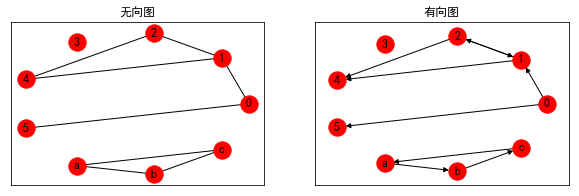

In [12]:
%pylab inline
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号 '-' 显示为方块的问题

plt.subplots(1, 2, figsize=(10, 3))

plt.subplot(121)
nx.draw(G1, pos1, with_labels=True, font_weight='bold')
plt.title('无向图')
plt.axis('on')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
nx.draw(G2, pos2, with_labels=True, font_weight='bold')
plt.title('有向图')
plt.axis('on')
plt.xticks([])
plt.yticks([])

plt.show()

# 控制 numpy 输出小数位数

In [13]:
import numpy as np

np.set_printoptions(precision = 3)

# 邻接矩阵

In [15]:
A = nx.adjacency_matrix(G1)

print('邻接矩阵:\n', A.todense())

邻接矩阵:
 [[1.  1.  0.  0.  0.  2.  0.  0.  0. ]
 [1.  0.  7.  0.  5.  0.  0.  0.  0. ]
 [0.  7.  0.  0.  6.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  5.  6.  0.  0.  0.  0.  0.  0. ]
 [2.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  0.  0.  0.5 0.  0.5]
 [0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]]


# 关联矩阵

In [16]:
I = nx.incidence_matrix(G1)

print('\n关联矩阵:\n', I.todense())


关联矩阵:
 [[0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1.]]


# 拉普拉斯矩阵

In [17]:
L = nx.laplacian_matrix(G1)

print('\n拉普拉斯矩阵:\n', L.todense())


拉普拉斯矩阵:
 [[ 3.  -1.   0.   0.   0.  -2.   0.   0.   0. ]
 [-1.  13.  -7.   0.  -5.   0.   0.   0.   0. ]
 [ 0.  -7.  13.   0.  -6.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -5.  -6.   0.  11.   0.   0.   0.   0. ]
 [-2.   0.   0.   0.   0.   2.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   1.  -0.5 -0.5]
 [ 0.   0.   0.   0.   0.   0.  -0.5  1.  -0.5]
 [ 0.   0.   0.   0.   0.   0.  -0.5 -0.5  1. ]]


## 标准化的拉普拉斯矩阵

In [18]:
NL = nx.normalized_laplacian_matrix(G1)

print('\n标准化的拉普拉斯矩阵:\n', NL.todense())


标准化的拉普拉斯矩阵:
 [[ 0.75  -0.139  0.     0.     0.    -0.707  0.     0.     0.   ]
 [-0.139  1.    -0.538  0.    -0.418  0.     0.     0.     0.   ]
 [ 0.    -0.538  1.     0.    -0.502  0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.    -0.418 -0.502  0.     1.     0.     0.     0.     0.   ]
 [-0.707  0.     0.     0.     0.     1.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     1.    -0.5   -0.5  ]
 [ 0.     0.     0.     0.     0.     0.    -0.5    1.    -0.5  ]
 [ 0.     0.     0.     0.     0.     0.    -0.5   -0.5    1.   ]]


## 有向图拉普拉斯矩阵

In [20]:
DL = nx.directed_laplacian_matrix(G2)

print('\n有向拉普拉斯矩阵:\n', DL)


有向拉普拉斯矩阵:
 [[ 0.757 -0.097 -0.006 -0.052 -0.087 -0.278 -0.012 -0.012 -0.012]
 [-0.097  0.994 -0.434 -0.041 -0.319 -0.051 -0.009 -0.009 -0.009]
 [-0.006 -0.434  0.994 -0.045 -0.242 -0.056 -0.01  -0.01  -0.01 ]
 [-0.052 -0.041 -0.045  0.889 -0.129 -0.114 -0.025 -0.025 -0.025]
 [-0.087 -0.319 -0.242 -0.129  0.889 -0.117 -0.029 -0.029 -0.029]
 [-0.278 -0.051 -0.056 -0.114 -0.117  0.889 -0.026 -0.026 -0.026]
 [-0.012 -0.009 -0.01  -0.025 -0.029 -0.026  0.994 -0.481 -0.481]
 [-0.012 -0.009 -0.01  -0.025 -0.029 -0.026 -0.481  0.994 -0.481]
 [-0.012 -0.009 -0.01  -0.025 -0.029 -0.026 -0.481 -0.481  0.994]]


# 拉普拉斯算子的特征值

In [21]:
LS = nx.laplacian_spectrum(G1)

print('\n拉普拉斯算子的特征值:\n', LS)


拉普拉斯算子的特征值:
 [-1.277e-15 -1.103e-15 -5.551e-17  7.000e-01  1.500e+00  1.500e+00
  4.576e+00  1.660e+01  2.013e+01]


# 邻接矩阵的特征值

In [22]:
AS = nx.adjacency_spectrum(G1)

print('\n邻接矩阵的特征值:\n', AS)


邻接矩阵的特征值:
 [12.068+0.j  2.588+0.j -1.513+0.j -7.219+0.j -4.925+0.j -0.5  +0.j
  1.   +0.j -0.5  +0.j  0.   +0.j]


# 无向图的代数连通性

In [23]:
AC = nx.algebraic_connectivity(G1)

print('\n无向图的代数连通性:\n', AC)


无向图的代数连通性:
 0.0


# 图的光谱排序

In [24]:
SO = nx.spectral_ordering(G1)

print('\n图的光谱排序:\n', SO)


图的光谱排序:
 ['4', '2', '1', '0', '5', '3', 'a', 'b', 'c']


# NetworkX 系列教程
- [创建 graph](http://www.cnblogs.com/wushaogui/p/9199726.html)
- [图论---问题篇 ](http://www.cnblogs.com/wushaogui/p/9222828.html)